<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week%206/Online%20Retail/Colab%20Notebook/Data_Clustering_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/raflinoob132/MachineLearning-1/main/Week%206/Online%20Retail/Colab%20Notebook/Book1.csv"
df = pd.read_csv(url)

# Bersihkan dan pilih fitur numerik
df_clean = df.dropna()
df_numeric = df_clean.select_dtypes(include=[np.number])

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)


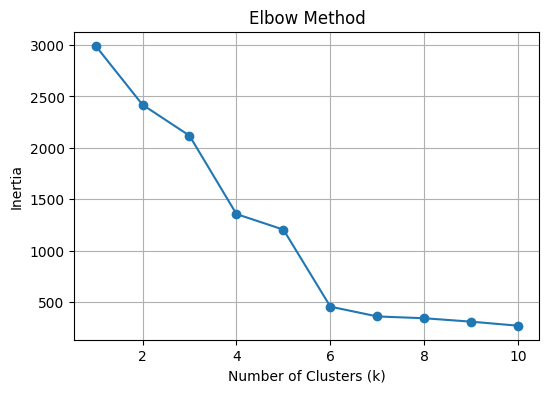

In [7]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()


In [8]:
# KMeans dengan 3 cluster (misalnya)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


In [9]:
def evaluate(X, labels, name):
    sil = silhouette_score(X, labels) if len(set(labels)) > 1 and -1 not in labels else None
    ch = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else None
    db = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else None
    return {
        "Model": name,
        "Silhouette": sil,
        "Calinski-Harabasz": ch,
        "Davies-Bouldin": db
    }

results = [
    evaluate(X_scaled, kmeans_labels, "KMeans"),
    evaluate(X_scaled, dbscan_labels, "DBSCAN")
]

pd.DataFrame(results)


,Model,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,KMeans,0.554964,205.679208,0.666719
1,DBSCAN,NaN,215.323417,1.296107
